[*********************100%***********************]  1 of 1 completed

Training data head:
Price           Close       High        Low       Open     Volume
Ticker          GOOGL      GOOGL      GOOGL      GOOGL      GOOGL
Date                                                             
2010-01-04  15.609804  15.678545  15.547291  15.614785   78169752
2010-01-05  15.541063  15.636952  15.480044  15.620514  120067812
2010-01-06  15.149294  15.587638  15.101973  15.587638  158988852
2010-01-07  14.796624  15.192630  14.760511  15.177685  256315428
2010-01-08  14.993880  15.024514  14.672343  14.744322  188783028
Epoch 1/20



/opt/anaconda3/envs/catapult/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


63/63 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - loss: 0.0571
Epoch 2/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 4.9922e-04
Epoch 3/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 4.2375e-04
Epoch 4/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 4.5405e-04
Epoch 5/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 4.6139e-04
Epoch 6/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 3.8801e-04
Epoch 7/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 4.3734e-04
Epoch 8/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 3.9011e-04
Epoch 9/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 4.1437e-04
Epoch 10/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 4.0228e-04
Epoch 11/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 3.8477e-04
Epoch 12/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 3.4919e-04
Epoch 13/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 3.8968e-04
Epoch 14/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 4.0729e-04
Epoch 15/20
63/63 ━━━━━━━━━━━━

[*********************100%***********************]  1 of 1 completed

Test data head (2024):
Price           Close       High        Low       Open    Volume
Ticker          GOOGL      GOOGL      GOOGL      GOOGL     GOOGL
Date                                                            
2021-01-04  85.895844  87.705186  84.950860  87.581282  37324000
2021-01-05  86.588531  86.925915  85.436538  85.844089  20360000
2021-01-06  85.734100  86.783587  84.401475  84.608485  46588000
2021-01-07  88.294861  88.468029  85.927175  85.927175  41936000
2021-01-08  89.463783  89.539919  87.641988  88.435200  35484000


32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step


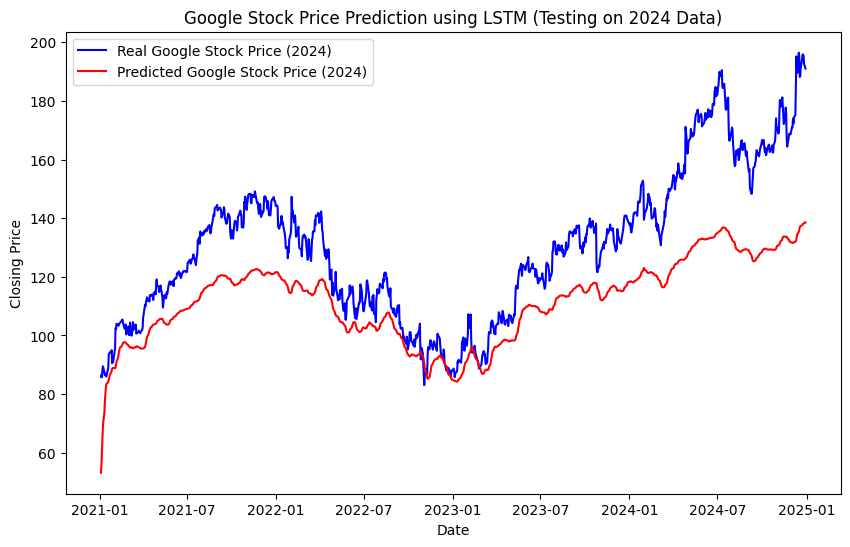

In [3]:
# Import necessary libraries
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense




# ===============================
# 1. Download Stock Data Using yfinance
# ===============================
ticker = ['GOOGL']  # Google ticker symbol


# Download historical data from January 1, 2010 to January 1, 2023 for training
train_data = yf.download(ticker, start='2010-01-01', end='2018-01-01')
print("Training data head:")
print(train_data.head())
# Focus on the 'Close' price
data_Close = train_data[['Close']]


# ===============================
# 2. Preprocess the Data for Training
# ===============================
# Scale the closing prices to the range [0, 1]
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data_Close)


# Create training sequences using a sliding window
window_size = 21


X_train = []
y_train = []


for i in range(window_size, len(scaled_data)):
    X_train.append(scaled_data[i-window_size:i, 0])  # 60-day window
    y_train.append(scaled_data[i, 0])                # next day's closing price


# Convert to numpy arrays
X_train, y_train = np.array(X_train), np.array(y_train)


# Reshape training data to 3 dimensions: (samples, timesteps, features)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))


# ===============================
# 3. Build the LSTM Model
# ===============================
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(units=50))
model.add(Dense(1))


# Compile the model using the Adam optimizer and mean squared error loss
model.compile(optimizer='adam', loss='mean_squared_error')


# ===============================
# 4. Train the Model
# ===============================
# Train for 20 epochs with a batch size of 32
model.fit(X_train, y_train, epochs=20, batch_size=32)


# ===============================
# 5. Download and Prepare 2024 Test Data
# ===============================
# Download new test data for 2024 (first 3 months)
test_data = yf.download(ticker, start='2021-01-01', end='2024-12-31')
print("Test data head (2024):")
print(test_data.head())


# Focus on the 'Close' price for test data
test_Close = test_data[['Close']]


# To create a sliding window for test predictions, combine the last window_size days from training with the test data.
last_train_days = data_Close.tail(window_size)
combined = pd.concat([last_train_days, test_Close], ignore_index=False)


# Scale the combined data using the same scaler used for training data
scaled_combined = scaler.transform(combined)


# Create test sequences
X_test = []
y_test = []


# Build sliding window on the combined scaled data
# Note: The first window_size points are from the tail of training data; predictions will be for the test period.
for i in range(window_size, len(scaled_combined)):
    X_test.append(scaled_combined[i-window_size:i, 0])
    # To evaluate, we also store the true values (which will only be available for the test period)
    y_test.append(scaled_combined[i, 0])


X_test = np.array(X_test)
y_test = np.array(y_test)


# Reshape X_test to match LSTM input shape
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))


# ===============================
# 6. Make Predictions on the 2024 Data
# ===============================
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)


# Get the actual closing prices for the test period from the combined data,
# discarding the initial training tail
# We'll use the index from the test_data as our x-axis for plotting.
actual_prices = combined.iloc[window_size:]['Close']


# ===============================
# 7. Visualize the Results
# ===============================
plt.figure(figsize=(10, 6))
plt.plot(actual_prices.index, actual_prices.values, color='blue', label='Real Google Stock Price (2024)')
plt.plot(actual_prices.index, predictions, color='red', label='Predicted Google Stock Price (2024)')
plt.title('Google Stock Price Prediction using LSTM (Testing on 2024 Data)')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.show()